In [9]:
import pandas as pd
from pathlib import Path

def load_dataset_from_structure(root_path):
    data = []
    for file in root_path.glob('*/*/*.csv'):
        try:
            df = pd.read_csv(file)

            category = file.parents[1].name  # DDoS, DoS, etc.
            attack = file.parent.name        # DDoS ICMP, DoS TCP, etc.
            label_class = 'Benign' if category.upper() == 'BENIGN' else 'Attack'

            df['category'] = category
            df['attack'] = attack
            df['class'] = label_class

            data.append(df)
        except Exception as e:
            print(f"[ERROR] Failed to read file {file}: {e}")
    return pd.concat(data, ignore_index=True)

# Load train
train_root = Path('../../Data/CICIoMT2024/train')
train_df = load_dataset_from_structure(train_root)

# Load test
test_root = Path('../../Data/CICIoMT2024/test')
test_df = load_dataset_from_structure(test_root)

# Cek ringkasan
print("Train set:", train_df.shape)
print(train_df[['category', 'attack', 'class']].value_counts())
print("\nTest set:", test_df.shape)
print(test_df[['category', 'attack', 'class']].value_counts())


Train set: (7160831, 48)
category  attack     class 
DDoS      DDoS UDP   Attack    1635956
          DDoS ICMP  Attack    1537476
          DDoS TCP   Attack     804465
          DDoS SYN   Attack     801962
DoS       DoS UDP    Attack     566950
Name: count, dtype: int64

Test set: (1614182, 48)
category  attack     class 
DDoS      DDoS UDP   Attack    362070
          DDoS ICMP  Attack    349699
          DDoS TCP   Attack    182598
          DDoS SYN   Attack    172397
DoS       DoS UDP    Attack    137553
Name: count, dtype: int64


In [11]:
# Cek ringkasan
print("Train set:", train_df.shape)
print(train_df[['category', 'attack', 'class']].value_counts())
print("\nTest set:", test_df.shape)
print(test_df[['category', 'attack', 'class']].value_counts())

Train set: (7160831, 48)
category  attack              class 
DDoS      DDoS UDP            Attack    1635956
          DDoS ICMP           Attack    1537476
          DDoS TCP            Attack     804465
          DDoS SYN            Attack     801962
DoS       DoS UDP             Attack     566950
          DoS SYN             Attack     441903
          DoS ICMP            Attack     416292
          DoS TCP             Attack     380384
BENIGN    BENIGN              Benign     192732
MQTT      DDoS Connect Flood  Attack     173036
RECON     Port Scan           Attack      83981
MQTT      DoS Publish Flood   Attack      44376
          DDoS Publish Flood  Attack      27623
RECON     OS Scan             Attack      16832
SPOOFING  SPOOFING            Attack      16047
MQTT      DoS Connect Flood   Attack      12773
          Malformed Data      Attack       5130
RECON     Recon VulScan       Attack       2173
          Ping Sweep          Attack        740
Name: count, dtype: int64


In [13]:
train_df['attack'].value_counts()

attack
DDoS UDP              1635956
DDoS ICMP             1537476
DDoS TCP               804465
DDoS SYN               801962
DoS UDP                566950
DoS SYN                441903
DoS ICMP               416292
DoS TCP                380384
BENIGN                 192732
DDoS Connect Flood     173036
Port Scan               83981
DoS Publish Flood       44376
DDoS Publish Flood      27623
OS Scan                 16832
SPOOFING                16047
DoS Connect Flood       12773
Malformed Data           5130
Recon VulScan            2173
Ping Sweep                740
Name: count, dtype: int64

In [15]:
train_df['category'].value_counts()

category
DDoS        4779859
DoS         1805529
MQTT         262938
BENIGN       192732
RECON        103726
SPOOFING      16047
Name: count, dtype: int64

In [19]:
train_df['class'].value_counts()

class
Attack    6968099
Benign     192732
Name: count, dtype: int64

In [21]:
test_df['class'].value_counts()

class
Attack    1576575
Benign      37607
Name: count, dtype: int64

In [23]:
test_df['category'].value_counts()

category
DDoS        1066764
DoS          416676
MQTT          63715
BENIGN        37607
RECON         27676
SPOOFING       1744
Name: count, dtype: int64

In [25]:
test_df['attack'].value_counts()

attack
DDoS UDP              362070
DDoS ICMP             349699
DDoS TCP              182598
DDoS SYN              172397
DoS UDP               137553
DoS SYN                98595
DoS ICMP               98432
DoS TCP                82096
DDoS Connect Flood     41916
BENIGN                 37607
Port Scan              22622
DoS Publish Flood       8505
DDoS Publish Flood      8416
OS Scan                 3834
DoS Connect Flood       3131
Malformed Data          1747
SPOOFING                1744
Recon VulScan           1034
Ping Sweep               186
Name: count, dtype: int64

In [27]:
# Gabungkan train dan test menjadi satu DataFrame
df = pd.concat([train_df, test_df], ignore_index=True)

In [29]:
df['attack'].value_counts()

attack
DDoS UDP              1998026
DDoS ICMP             1887175
DDoS TCP               987063
DDoS SYN               974359
DoS UDP                704503
DoS SYN                540498
DoS ICMP               514724
DoS TCP                462480
BENIGN                 230339
DDoS Connect Flood     214952
Port Scan              106603
DoS Publish Flood       52881
DDoS Publish Flood      36039
OS Scan                 20666
SPOOFING                17791
DoS Connect Flood       15904
Malformed Data           6877
Recon VulScan            3207
Ping Sweep                926
Name: count, dtype: int64

In [31]:
df['category'].value_counts()

category
DDoS        5846623
DoS         2222205
MQTT         326653
BENIGN       230339
RECON        131402
SPOOFING      17791
Name: count, dtype: int64

In [33]:
df['class'].value_counts()

class
Attack    8544674
Benign     230339
Name: count, dtype: int64

In [35]:
# check missing values in variables

df.isnull().sum()

Header_Length      0
Protocol Type      0
Duration           0
Rate               0
Srate              0
Drate              0
fin_flag_number    0
syn_flag_number    0
rst_flag_number    0
psh_flag_number    0
ack_flag_number    0
ece_flag_number    0
cwr_flag_number    0
ack_count          0
syn_count          0
fin_count          0
rst_count          0
HTTP               0
HTTPS              0
DNS                0
Telnet             0
SMTP               0
SSH                0
IRC                0
TCP                0
UDP                0
DHCP               0
ARP                0
ICMP               0
IGMP               0
IPv                0
LLC                0
Tot sum            0
Min                0
Max                0
AVG                0
Std                0
Tot size           0
IAT                0
Number             0
Magnitue           0
Radius             0
Covariance         0
Variance           0
Weight             0
category           0
attack             0
class        

In [39]:
# find categorical variables

categorical = [var for var in df.columns if df[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :', categorical)

There are 3 categorical variables

The categorical variables are : ['category', 'attack', 'class']


In [43]:
# find numerical variables

numerical = [var for var in df.columns if df[var].dtype!='O']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :', numerical)

There are 45 numerical variables

The numerical variables are : ['Header_Length', 'Protocol Type', 'Duration', 'Rate', 'Srate', 'Drate', 'fin_flag_number', 'syn_flag_number', 'rst_flag_number', 'psh_flag_number', 'ack_flag_number', 'ece_flag_number', 'cwr_flag_number', 'ack_count', 'syn_count', 'fin_count', 'rst_count', 'HTTP', 'HTTPS', 'DNS', 'Telnet', 'SMTP', 'SSH', 'IRC', 'TCP', 'UDP', 'DHCP', 'ARP', 'ICMP', 'IGMP', 'IPv', 'LLC', 'Tot sum', 'Min', 'Max', 'AVG', 'Std', 'Tot size', 'IAT', 'Number', 'Magnitue', 'Radius', 'Covariance', 'Variance', 'Weight']


In [45]:
df

,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,psh_flag_number,...,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,category,attack,class
0,134.3,7.10,64.0,40415.288318,40415.288318,0.0,0.0,0.0,0.0,0.5,...,1.694641e+08,5.5,15.312231,68.201654,2644.242675,0.9,38.5,BENIGN,BENIGN,Benign
1,137.0,4.70,49.9,58749.191833,58749.191833,0.0,0.0,0.0,0.0,0.2,...,1.694641e+08,13.5,13.468364,84.997147,5328.483794,1.0,244.6,BENIGN,BENIGN,Benign
2,283.9,6.00,64.0,3.497439,3.497439,0.0,0.0,0.0,0.0,0.5,...,8.070469e-05,5.5,12.229315,14.458481,124.725884,0.9,38.5,BENIGN,BENIGN,Benign
3,297.3,6.00,64.0,7297.703020,7297.703020,0.0,0.0,0.0,0.0,0.5,...,1.694641e+08,13.5,12.552920,21.904691,240.536207,1.0,244.6,BENIGN,BENIGN,Benign
4,572.3,7.10,57.7,2.549120,2.549120,0.0,0.0,0.0,0.0,0.4,...,9.993820e-02,5.5,13.928729,98.625651,11737.768847,0.9,38.5,BENIGN,BENIGN,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8775008,35466.4,6.00,64.0,2.041653,2.041653,0.0,0.0,0.0,0.0,0.5,...,1.694028e+08,13.5,12.650422,23.964774,288.120009,1.0,244.6,SPOOFING,SPOOFING,Attack
8775009,30758.3,6.00,64.0,1.652137,1.652137,0.0,0.0,0.0,0.0,0.5,...,1.407862e-04,5.5,12.519220,21.018121,259.671365,0.9,38.5,SPOOFING,SPOOFING,Attack
8775010,13242.4,7.10,104.7,0.731182,0.731182,0.0,0.0,0.0,0.0,0.5,...,1.694028e+08,13.5,12.949606,28.237029,400.112482,1.0,244.6,SPOOFING,SPOOFING,Attack
8775011,37550.4,6.00,64.0,2.041411,2.041411,0.0,0.0,0.0,0.0,0.5,...,4.618168e-05,5.5,12.886801,22.399644,286.953348,0.9,38.5,SPOOFING,SPOOFING,Attack


In [51]:
import pandas as pd
import numpy as np
import os, glob

from pathlib import Path

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

import matplotlib.pyplot as plt
import seaborn as sns

# Label encoding
le = LabelEncoder()
y_encoded = le.fit_transform(df['class'])


# Fitur numerik + scaling
X = df.drop(['class', 'category', 'attack'], axis=1, errors='ignore').select_dtypes(include=[np.number])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

In [53]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),

    'AdaBoost': AdaBoostClassifier(
        estimator=DecisionTreeClassifier(max_depth=3, class_weight='balanced'),
        n_estimators=100,
        algorithm='SAMME',
        random_state=42
    ),

    'XGBoost': XGBClassifier(
        use_label_encoder=False,
        objective='multi:softmax',
        eval_metric='mlogloss',
        num_class=len(le.classes_),
        random_state=42
    ),

    'LightGBM': LGBMClassifier(
        objective='multiclass',
        num_class=len(le.classes_),
        random_state=42
    ),

    'CatBoost': CatBoostClassifier(
        verbose=0,
        iterations=100,
        depth=6,
        loss_function='MultiClass',
        random_seed=42
    ),

    'Extra Trees': ExtraTreesClassifier(n_estimators=100, random_state=42),
}


In [55]:
models['Voting Classifier'] = VotingClassifier(
    estimators=[
        ('rf', models['Random Forest']),
        ('xgb', models['XGBoost']),
        ('lgbm', models['LightGBM']),
    ],
    voting='hard'
)



===== Random Forest =====
              precision    recall  f1-score       support
Attack         0.999832  0.999569  0.999701  1.709052e+06
Benign         0.984138  0.993754  0.988923  4.595100e+04
accuracy       0.999417  0.999417  0.999417  9.994171e-01
macro avg      0.991985  0.996662  0.994312  1.755003e+06
weighted avg   0.999421  0.999417  0.999418  1.755003e+06


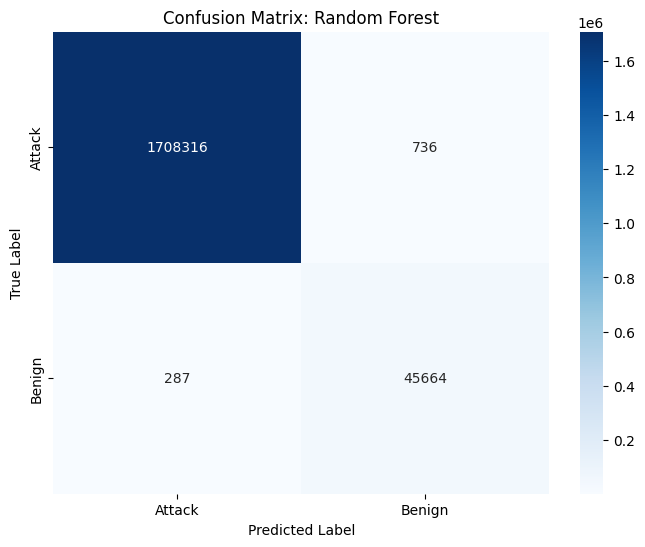


===== AdaBoost =====
              precision    recall  f1-score       support
Attack         0.999979  0.997785  0.998881  1.709052e+06
Benign         0.923826  0.999238  0.960054  4.595100e+04
accuracy       0.997823  0.997823  0.997823  9.978228e-01
macro avg      0.961903  0.998512  0.979467  1.755003e+06
weighted avg   0.997986  0.997823  0.997864  1.755003e+06


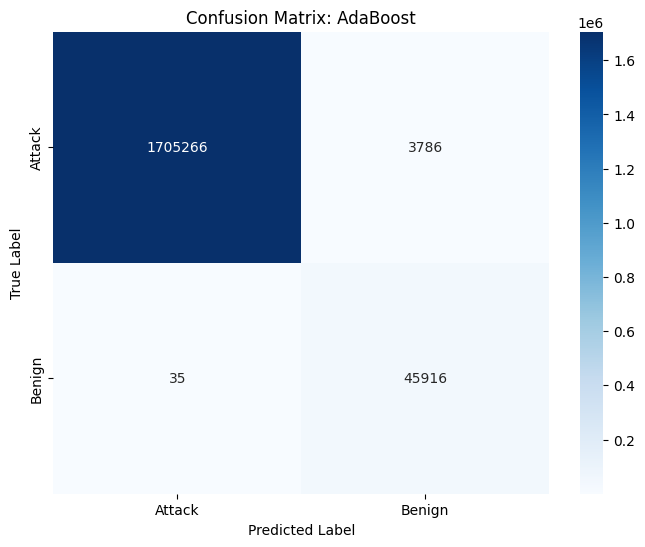


===== XGBoost =====


C:\Users\Admin\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [16:21:41] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score       support
Attack         0.999787  0.999430  0.999608  1.709052e+06
Benign         0.979060  0.992079  0.985526  4.595100e+04
accuracy       0.999237  0.999237  0.999237  9.992370e-01
macro avg      0.989424  0.995754  0.992567  1.755003e+06
weighted avg   0.999244  0.999237  0.999239  1.755003e+06


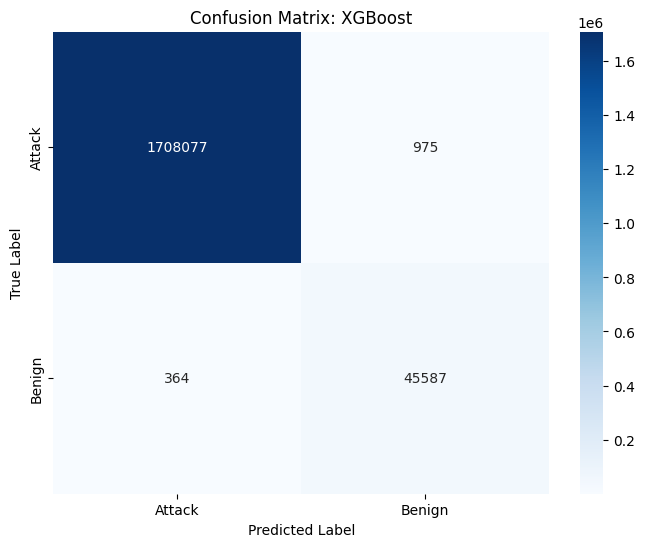


===== LightGBM =====
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.551034 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5678
[LightGBM] [Info] Number of data points in the train set: 7020010, number of used features: 44
[LightGBM] [Info] Start training from score -0.026617
[LightGBM] [Info] Start training from score -3.639478
              precision    recall  f1-score       support
Attack         0.999759  0.999368  0.999564  1.709052e+06
Benign         0.976834  0.991056  0.983893  4.595100e+04
accuracy       0.999150  0.999150  0.999150  9.991504e-01
macro avg      0.988297  0.995212  0.991729  1.755003e+06
weighted avg   0.999159  0.999150  0.999153  1.755003e+06


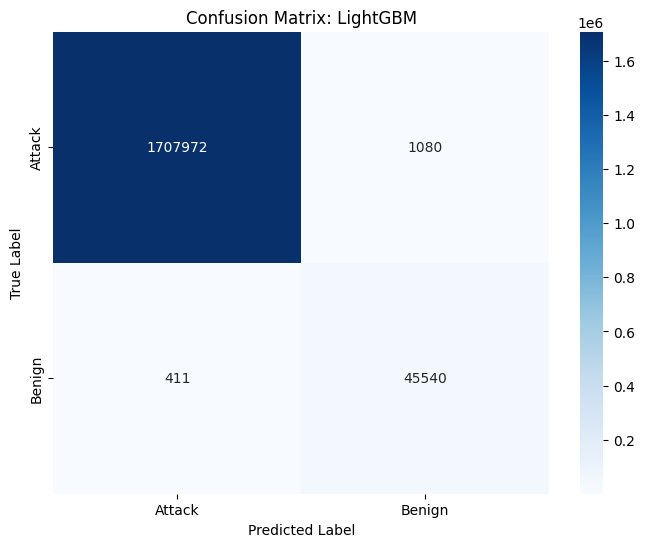


===== CatBoost =====


C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:153: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score       support
Attack         0.999742  0.999316  0.999529  1.709052e+06
Benign         0.974957  0.990403  0.982619  4.595100e+04
accuracy       0.999083  0.999083  0.999083  9.990826e-01
macro avg      0.987349  0.994859  0.991074  1.755003e+06
weighted avg   0.999093  0.999083  0.999086  1.755003e+06


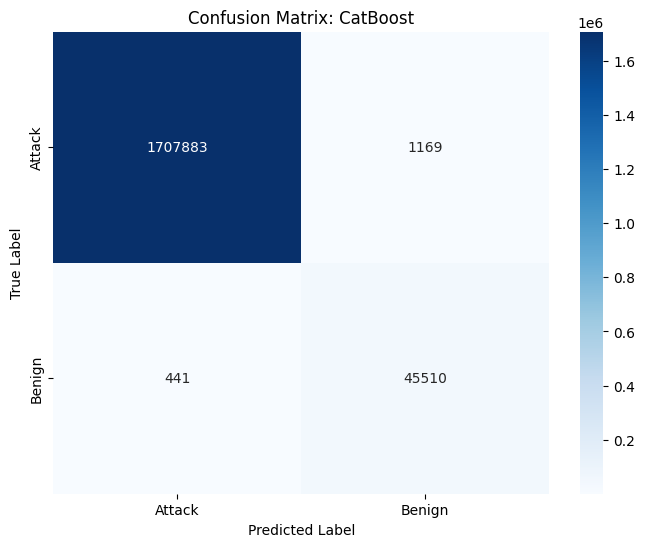


===== Extra Trees =====


In [ ]:
results = {}

for name, model in models.items():
    print(f"\n===== {name} =====")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Inverse ke label asli
    y_pred_labels = le.inverse_transform(y_pred)
    y_true_labels = le.inverse_transform(y_test)

    # Classification Report
    report = classification_report(
        y_true_labels, y_pred_labels, digits=5,
        output_dict=True, zero_division=0
    )
    report_df = pd.DataFrame(report).transpose()
    print(report_df)

    # Confusion Matrix
    cm = confusion_matrix(y_true_labels, y_pred_labels, labels=le.classes_)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=le.classes_, yticklabels=le.classes_)
    plt.title(f"Confusion Matrix: {name}")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

    results[name] = {
        'report': report_df,
        'confusion_matrix': cm
    }


In [ ]:
performance_data = []

for name, result in results.items():
    report = result['report']
    accuracy = report.loc['accuracy']['precision'] if 'accuracy' in report.index else None
    macro = report.loc['macro avg']
    performance_data.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision (Macro Avg)': macro['precision'],
        'Recall (Macro Avg)': macro['recall'],
        'F1-Score (Macro Avg)': macro['f1-score']
    })

performance_df = pd.DataFrame(performance_data)
performance_df.sort_values(by='F1-Score (Macro Avg)', ascending=False, inplace=True)
performance_df.reset_index(drop=True, inplace=True)
display(performance_df)


In [ ]:
bar_width = 0.2
index = np.arange(len(performance_df))

plt.figure(figsize=(12, 6))
plt.bar(index, performance_df['Accuracy'], bar_width, label='Accuracy')
plt.bar(index + bar_width, performance_df['Precision (Macro Avg)'], bar_width, label='Precision')
plt.bar(index + 2*bar_width, performance_df['Recall (Macro Avg)'], bar_width, label='Recall')
plt.bar(index + 3*bar_width, performance_df['F1-Score (Macro Avg)'], bar_width, label='F1-Score')

plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Performance Comparison of Ensemble Models')
plt.xticks(index + 1.5 * bar_width, performance_df['Model'], rotation=45)
plt.ylim(0, 1.05)
plt.legend()
plt.tight_layout()
plt.grid(True, axis='y')
plt.show()
